单飞机单入射角随频率变化total RCS 2D图, 用mean就和CST的结果一样了，用sum的话趋势一样值不一样，说明没什么意义，用mean就行了。

单频点backscattered RCS 包络线成功

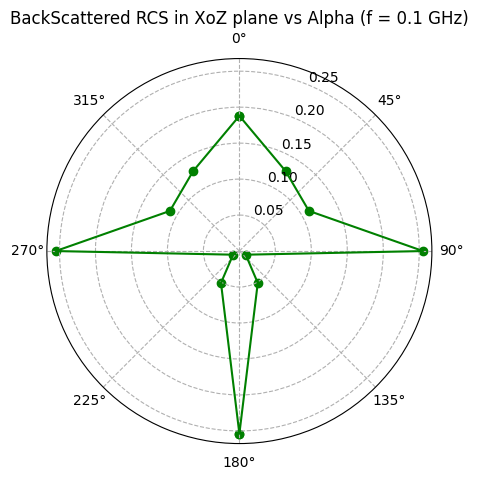

Time taken: 0.84 seconds


In [8]:
import os
import re
import torch
import matplotlib.pyplot as plt
import numpy as np
import time

tic = time.time()

src_folder = "/mnt/Disk/jiangxiaotian/puredatasets/mul2347_train"
pattern = r"([a-zA-Z0-9]{4})_theta(\d+)phi(\d+)f(\d+\.\d+).pt"

data = {}

# 读取文件并筛选数据
files = os.listdir(src_folder)
for file_name in files:
    match = re.match(pattern, file_name)
    if match:
        plane = match.group(1)
        theta = int(match.group(2))
        phi = int(match.group(3))
        f = float(match.group(4))

        if plane == 'b943' and f == 0.1 and (phi == 0 or phi == 180):
            src_file_path = os.path.join(src_folder, file_name)
            tensor = torch.load(src_file_path)
            tensor[:, 0][tensor[:, 0] == 0] = tensor[:, -1][tensor[:, 0] == 0]
            rcs_value = tensor[theta*2,phi*2].item()  # 假设张量包含一个单一的RCS值

            # 存储数据
            key = (theta, phi)
            data[key] = rcs_value

# 转换数据格式用于绘图
theta_values = sorted(set(theta for theta, phi in data.keys()))
alpha_values_0 = np.deg2rad(np.array(theta_values) - 0)  # phi=0, theta 0-180 -> alpha -90 to 90
alpha_values_180 = np.deg2rad(360 - np.array(theta_values))  # phi=180, theta 0-180 -> alpha 90 to 270

rcs_values_0 = [data[(theta, 0)] for theta in theta_values if (theta, 0) in data]
rcs_values_180 = [data[(theta, 180)] for theta in theta_values if (theta, 180) in data]

# 合并alpha和RCS值
alpha_values = np.concatenate((alpha_values_0, alpha_values_180))
rcs_values = np.concatenate((rcs_values_0, rcs_values_180))

# 对 alpha_values 和 rcs_values 进行排序
sorted_idx = np.argsort(alpha_values)
sorted_alpha = alpha_values[sorted_idx]
sorted_rcs = rcs_values[sorted_idx]

# 在末尾添加第一个数据点,使曲线闭合
sorted_alpha = np.concatenate((sorted_alpha, [sorted_alpha[0]]))
sorted_rcs = np.concatenate((sorted_rcs, [sorted_rcs[0]]))

# 绘制散点图和包围曲线
plt.figure(figsize=(5, 5))
ax = plt.subplot(111, projection='polar')
ax.scatter(alpha_values, rcs_values, marker='o', color='g')
ax.plot(sorted_alpha, sorted_rcs, color='g', linestyle='-')

ax.set_title('BackScattered RCS in XoZ plane vs Alpha (f = 0.1 GHz)')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.grid(True, which="both", ls="--")
plt.savefig('singleF_backRCS_curve.png')
plt.show()

toc = time.time()
print(f"Time taken: {toc - tic:.2f} seconds")

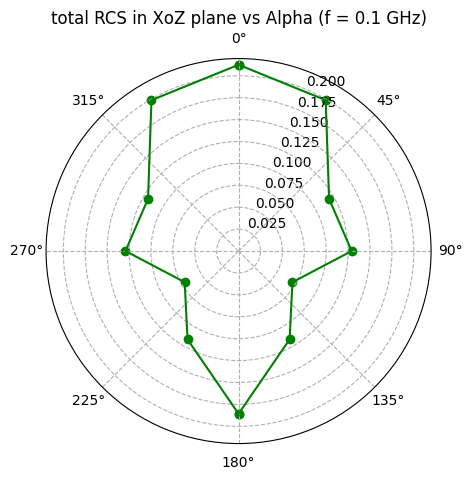

Time taken: 0.95 seconds


In [7]:
import os
import re
import torch
import matplotlib.pyplot as plt
import numpy as np
import time

tic = time.time()

src_folder = "/mnt/Disk/jiangxiaotian/puredatasets/mul2347_train"
pattern = r"([a-zA-Z0-9]{4})_theta(\d+)phi(\d+)f(\d+\.\d+).pt"

data = {}

# 读取文件并筛选数据
files = os.listdir(src_folder)
for file_name in files:
    match = re.match(pattern, file_name)
    if match:
        plane = match.group(1)
        theta = int(match.group(2))
        phi = int(match.group(3))
        f = float(match.group(4))

        if plane == 'b943' and f == 0.1 and (phi == 0 or phi == 180):
            src_file_path = os.path.join(src_folder, file_name)
            tensor = torch.load(src_file_path)
            tensor[:, 0][tensor[:, 0] == 0] = tensor[:, -1][tensor[:, 0] == 0]
            rcs_value = tensor.mean().item()  # 假设张量包含一个单一的RCS值

            # 存储数据
            key = (theta, phi)
            data[key] = rcs_value

# 转换数据格式用于绘图
theta_values = sorted(set(theta for theta, phi in data.keys()))
alpha_values_0 = np.deg2rad(np.array(theta_values) - 0)  # phi=0, theta 0-180 -> alpha -90 to 90
alpha_values_180 = np.deg2rad(360 - np.array(theta_values))  # phi=180, theta 0-180 -> alpha 90 to 270

rcs_values_0 = [data[(theta, 0)] for theta in theta_values if (theta, 0) in data]
rcs_values_180 = [data[(theta, 180)] for theta in theta_values if (theta, 180) in data]

# 合并alpha和RCS值
alpha_values = np.concatenate((alpha_values_0, alpha_values_180))
rcs_values = np.concatenate((rcs_values_0, rcs_values_180))

# 对 alpha_values 和 rcs_values 进行排序
sorted_idx = np.argsort(alpha_values)
sorted_alpha = alpha_values[sorted_idx]
sorted_rcs = rcs_values[sorted_idx]

# 在末尾添加第一个数据点,使曲线闭合
sorted_alpha = np.concatenate((sorted_alpha, [sorted_alpha[0]]))
sorted_rcs = np.concatenate((sorted_rcs, [sorted_rcs[0]]))

# 绘制散点图和包围曲线
plt.figure(figsize=(5, 5))
ax = plt.subplot(111, projection='polar')
ax.scatter(alpha_values, rcs_values, marker='o', color='g')
ax.plot(sorted_alpha, sorted_rcs, color='g', linestyle='-')

ax.set_title('total RCS in XoZ plane vs Alpha (f = 0.1 GHz)')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.grid(True, which="both", ls="--")
plt.savefig('singleF_totalRCS_curve.png')
plt.show()

toc = time.time()
print(f"Time taken: {toc - tic:.2f} seconds")

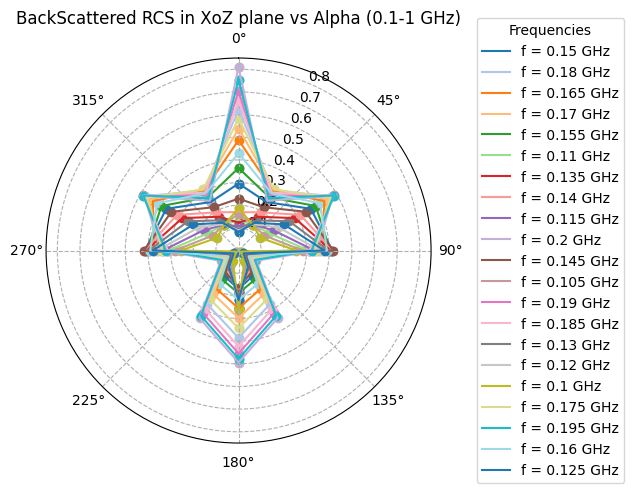

Time taken: 3.24 seconds


In [68]:
import os
import re
import torch
import matplotlib.pyplot as plt
import numpy as np
import itertools
import time

tic = time.time()

src_folder = "/mnt/Disk/jiangxiaotian/puredatasets/mul2347_train"
pattern = r"([a-zA-Z0-9]{4})_theta(\d+)phi(\d+)f(\d+\.\d+).pt"

data = {}

# 读取文件并筛选数据
files = os.listdir(src_folder)
for file_name in files:
    match = re.match(pattern, file_name)
    if match:
        plane = match.group(1)
        theta = int(match.group(2))
        phi = int(match.group(3))
        f = float(match.group(4))

        if plane == 'b943' and (f >= 0.1 and f <= 0.2) and (phi == 0 or phi == 180):
            src_file_path = os.path.join(src_folder, file_name)
            tensor = torch.load(src_file_path)
            tensor[:, 0][tensor[:, 0] == 0] = tensor[:, -1][tensor[:, 0] == 0]
            rcs_value = tensor[theta*2, phi*2].item()  # 假设张量包含一个单一的RCS值

            # 存储数据
            if f not in data:
                data[f] = {}
            data[f][(theta, phi)] = rcs_value

colors = itertools.cycle(plt.cm.tab20.colors)  # 循环使用20种颜色

# 绘制图形
plt.figure(figsize=(5, 5))
ax = plt.subplot(111, projection='polar')

for f, values in data.items():
    theta_values = sorted(set(theta for theta, phi in values.keys()))
    alpha_values_0 = np.deg2rad(np.array(theta_values) - 0)  # phi=0, theta 0-180 -> alpha -90 to 90
    alpha_values_180 = np.deg2rad(360 - np.array(theta_values))  # phi=180, theta 0-180 -> alpha 90 to 270

    rcs_values_0 = [values[(theta, 0)] for theta in theta_values if (theta, 0) in values]
    rcs_values_180 = [values[(theta, 180)] for theta in theta_values if (theta, 180) in values]

    # 合并alpha和RCS值
    alpha_values = np.concatenate((alpha_values_0, alpha_values_180))
    rcs_values = np.concatenate((rcs_values_0, rcs_values_180))

    # 对 alpha_values 和 rcs_values 进行排序
    sorted_idx = np.argsort(alpha_values)
    sorted_alpha = alpha_values[sorted_idx]
    sorted_rcs = rcs_values[sorted_idx]

    # 在末尾添加第一个数据点,使曲线闭合
    sorted_alpha = np.concatenate((sorted_alpha, [sorted_alpha[0]]))
    sorted_rcs = np.concatenate((sorted_rcs, [sorted_rcs[0]]))

    # 绘制散点图和包围曲线
    color = next(colors)
    ax.scatter(alpha_values, rcs_values, marker='o', color=color)
    ax.plot(sorted_alpha, sorted_rcs, color=color, linestyle='-', label=f'f = {f} GHz')

ax.set_title('BackScattered RCS in XoZ plane vs Alpha (0.1-1 GHz)')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), title='Frequencies')
plt.grid(True, which="both", ls="--")
plt.savefig('polar_plot_with_curve_multi_frequenciesthetaphi.png')
plt.show()

toc = time.time()
print(f"Time taken: {toc - tic:.2f} seconds")


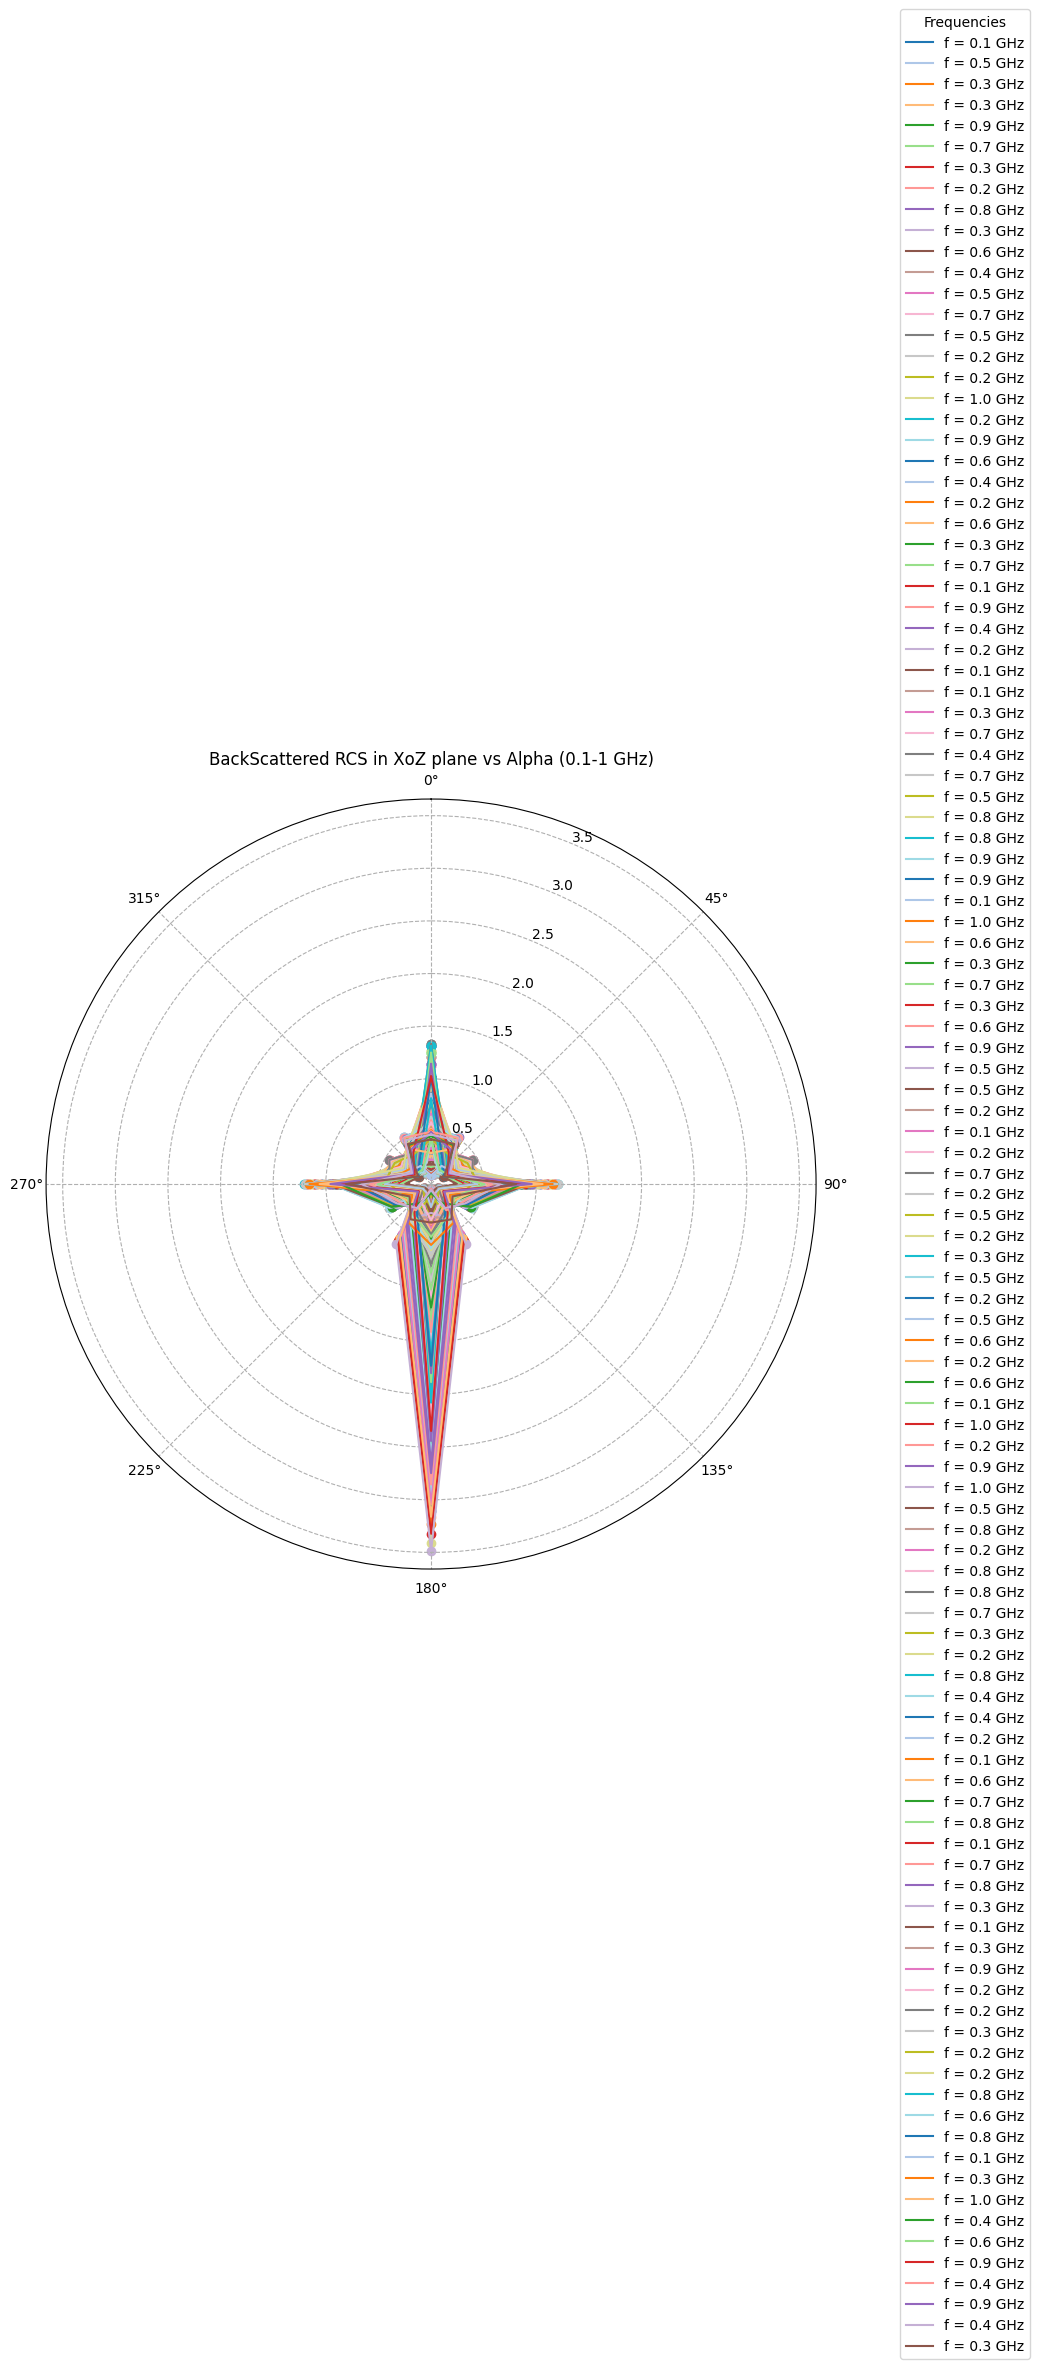

Time taken: 14.21 seconds


In [63]:
import os
import re
import torch
import matplotlib.pyplot as plt
import numpy as np
import itertools
import time

tic = time.time()

src_folder = "/mnt/Disk/jiangxiaotian/puredatasets/mul2347_train"
pattern = r"([a-zA-Z0-9]{4})_theta(\d+)phi(\d+)f(\d+\.\d+).pt"

data = {}

# 读取文件并筛选数据
files = os.listdir(src_folder)
for file_name in files:
    match = re.match(pattern, file_name)
    if match:
        plane = match.group(1)
        theta = int(match.group(2))
        phi = int(match.group(3))
        f = float(match.group(4))

        if plane == 'b943' and (f >= 0.1 and f <= 1) and (phi == 0 or phi == 180):
            src_file_path = os.path.join(src_folder, file_name)
            tensor = torch.load(src_file_path)
            tensor[:, 0][tensor[:, 0] == 0] = tensor[:, -1][tensor[:, 0] == 0]
            rcs_value = tensor[theta*2, :].mean().item()  # 取theta对应行的平均值
            
            # 合并phi=0 和 phi=180 的数据
            alpha = np.deg2rad(360 - theta) if phi == 180 else np.deg2rad(theta)
            
            if f not in data:
                data[f] = {}
            data[f][alpha] = rcs_value

colors = itertools.cycle(plt.cm.tab20.colors)  # 循环使用20种颜色

# 绘制图形
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='polar')

for f, values in data.items():
    alpha_values = sorted(values.keys())
    rcs_values = [values[alpha] for alpha in alpha_values]

    # 在末尾添加第一个数据点,使曲线闭合
    alpha_values = np.concatenate((alpha_values, [alpha_values[0]]))
    rcs_values = np.concatenate((rcs_values, [rcs_values[0]]))

    # 绘制散点图和包围曲线
    color = next(colors)
    ax.scatter(alpha_values, rcs_values, marker='o', color=color)
    ax.plot(alpha_values, rcs_values, color=color, linestyle='-', label=f'f = {f:.1f} GHz')

ax.set_title('BackScattered RCS in XoZ plane vs Alpha (0.1-1 GHz)')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), title='Frequencies')
plt.grid(True, which="both", ls="--")
plt.savefig('polar_plot_with_curve_multi_frequenciesalpha.png')
plt.show()

toc = time.time()
print(f"Time taken: {toc - tic:.2f} seconds")

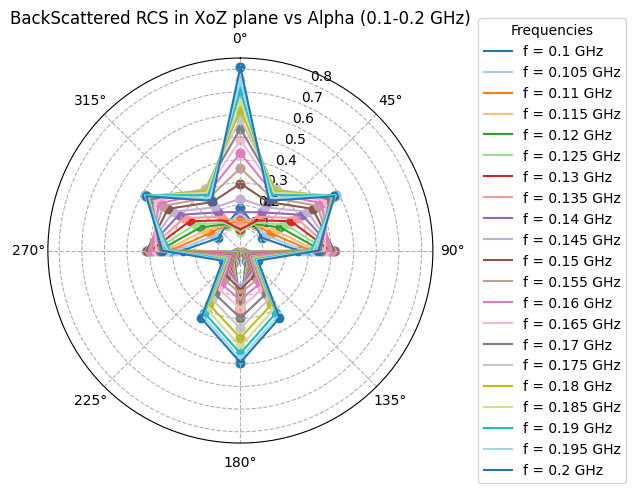

Time taken: 3.77 seconds


In [73]:
import os
import re
import torch
import matplotlib.pyplot as plt
import numpy as np
import itertools
import time

tic = time.time()

src_folder = "/mnt/Disk/jiangxiaotian/puredatasets/mul2347_train"
pattern = r"([a-zA-Z0-9]{4})_theta(\d+)phi(\d+)f(\d+\.\d+).pt"

data = {}

# 读取文件并筛选数据
files = os.listdir(src_folder)
for file_name in files:
    match = re.match(pattern, file_name)
    if match:
        plane = match.group(1)
        theta = int(match.group(2))
        phi = int(match.group(3))
        f = float(match.group(4))

        if plane == 'b943' and (f >= 0.1 and f <= 0.2) and (phi == 0 or phi == 180):
            src_file_path = os.path.join(src_folder, file_name)
            tensor = torch.load(src_file_path)
            tensor[:, 0][tensor[:, 0] == 0] = tensor[:, -1][tensor[:, 0] == 0]
            rcs_value = tensor[theta*2, phi*2].item()  # 假设张量包含一个单一的RCS值

            # 存储数据
            if f not in data:
                data[f] = {}
            data[f][(theta, phi)] = rcs_value

# 对f值从小到大排序
sorted_data = sorted(data.items(), key=lambda x: x[0])

colors = itertools.cycle(plt.cm.tab20.colors)  # 循环使用20种颜色

# 绘制图形
plt.figure(figsize=(5, 5))
ax = plt.subplot(111, projection='polar')

for f, values in sorted_data:
    theta_values = sorted(set(theta for theta, phi in values.keys()))
    alpha_values_0 = np.deg2rad(np.array(theta_values) - 0)  # phi=0, theta 0-180 -> alpha -90 to 90
    alpha_values_180 = np.deg2rad(360 - np.array(theta_values))  # phi=180, theta 0-180 -> alpha 90 to 270

    rcs_values_0 = [values[(theta, 0)] for theta in theta_values if (theta, 0) in values]
    rcs_values_180 = [values[(theta, 180)] for theta in theta_values if (theta, 180) in values]

    # 合并alpha和RCS值
    alpha_values = np.concatenate((alpha_values_0, alpha_values_180))
    rcs_values = np.concatenate((rcs_values_0, rcs_values_180))

    # 对 alpha_values 和 rcs_values 进行排序
    sorted_idx = np.argsort(alpha_values)
    sorted_alpha = alpha_values[sorted_idx]
    sorted_rcs = rcs_values[sorted_idx]

    # 在末尾添加第一个数据点,使曲线闭合
    sorted_alpha = np.concatenate((sorted_alpha, [sorted_alpha[0]]))
    sorted_rcs = np.concatenate((sorted_rcs, [sorted_rcs[0]]))

    # 绘制散点图和包围曲线
    color = next(colors)
    ax.scatter(alpha_values, rcs_values, marker='o', color=color)
    ax.plot(sorted_alpha, sorted_rcs, color=color, linestyle='-', label=f'f = {f} GHz')

ax.set_title('BackScattered RCS in XoZ plane vs Alpha (0.1-0.2 GHz)')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), title='Frequencies')
plt.grid(True, which="both", ls="--")
plt.savefig('polar_plot_with_curve_multi_frequenciesthetaphi.png')
plt.show()

toc = time.time()
print(f"Time taken: {toc - tic:.2f} seconds")

不同频率total RCS xoz平面2D曲线

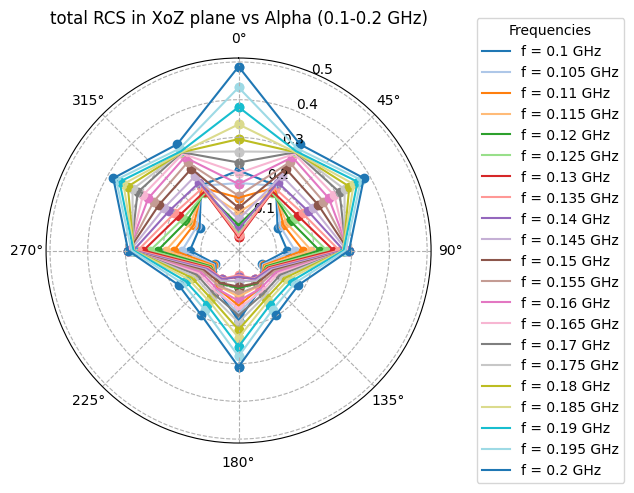

Time taken: 3.05 seconds


In [74]:
import os
import re
import torch
import matplotlib.pyplot as plt
import numpy as np
import itertools
import time

tic = time.time()

src_folder = "/mnt/Disk/jiangxiaotian/puredatasets/mul2347_train"
pattern = r"([a-zA-Z0-9]{4})_theta(\d+)phi(\d+)f(\d+\.\d+).pt"

data = {}

# 读取文件并筛选数据
files = os.listdir(src_folder)
for file_name in files:
    match = re.match(pattern, file_name)
    if match:
        plane = match.group(1)
        theta = int(match.group(2))
        phi = int(match.group(3))
        f = float(match.group(4))

        if plane == 'b943' and (f >= 0.1 and f <= 0.2) and (phi == 0 or phi == 180):
            src_file_path = os.path.join(src_folder, file_name)
            tensor = torch.load(src_file_path)
            tensor[:, 0][tensor[:, 0] == 0] = tensor[:, -1][tensor[:, 0] == 0]
            rcs_value = tensor.mean().item()  # 假设张量包含一个单一的RCS值

            # 存储数据
            if f not in data:
                data[f] = {}
            data[f][(theta, phi)] = rcs_value

# 对f值从小到大排序
sorted_data = sorted(data.items(), key=lambda x: x[0])

colors = itertools.cycle(plt.cm.tab20.colors)  # 循环使用20种颜色

# 绘制图形
plt.figure(figsize=(5, 5))
ax = plt.subplot(111, projection='polar')

for f, values in sorted_data:
    theta_values = sorted(set(theta for theta, phi in values.keys()))
    alpha_values_0 = np.deg2rad(np.array(theta_values) - 0)  # phi=0, theta 0-180 -> alpha -90 to 90
    alpha_values_180 = np.deg2rad(360 - np.array(theta_values))  # phi=180, theta 0-180 -> alpha 90 to 270

    rcs_values_0 = [values[(theta, 0)] for theta in theta_values if (theta, 0) in values]
    rcs_values_180 = [values[(theta, 180)] for theta in theta_values if (theta, 180) in values]

    # 合并alpha和RCS值
    alpha_values = np.concatenate((alpha_values_0, alpha_values_180))
    rcs_values = np.concatenate((rcs_values_0, rcs_values_180))

    # 对 alpha_values 和 rcs_values 进行排序
    sorted_idx = np.argsort(alpha_values)
    sorted_alpha = alpha_values[sorted_idx]
    sorted_rcs = rcs_values[sorted_idx]

    # 在末尾添加第一个数据点,使曲线闭合
    sorted_alpha = np.concatenate((sorted_alpha, [sorted_alpha[0]]))
    sorted_rcs = np.concatenate((sorted_rcs, [sorted_rcs[0]]))

    # 绘制散点图和包围曲线
    color = next(colors)
    ax.scatter(alpha_values, rcs_values, marker='o', color=color)
    ax.plot(sorted_alpha, sorted_rcs, color=color, linestyle='-', label=f'f = {f} GHz')

ax.set_title('total RCS in XoZ plane vs Alpha (0.1-0.2 GHz)')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), title='Frequencies')
plt.grid(True, which="both", ls="--")
plt.savefig('polar_plot_with_curve_multi_frequenciesthetaphi.png')
plt.show()

toc = time.time()
print(f"Time taken: {toc - tic:.2f} seconds")

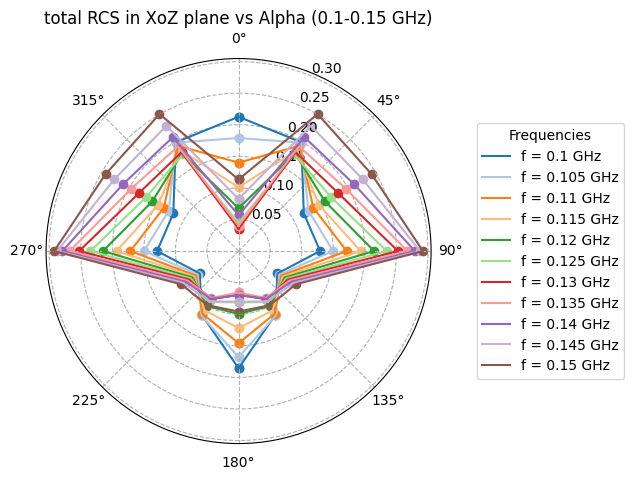

Time taken: 2.17 seconds


In [14]:
import os
import re
import torch
import matplotlib.pyplot as plt
import numpy as np
import itertools
import time

tic = time.time()

src_folder = "/mnt/Disk/jiangxiaotian/puredatasets/mul2347_train"
pattern = r"([a-zA-Z0-9]{4})_theta(\d+)phi(\d+)f(\d+\.\d+).pt"

data = {}

# 读取文件并筛选数据
files = os.listdir(src_folder)
for file_name in files:
    match = re.match(pattern, file_name)
    if match:
        plane = match.group(1)
        theta = int(match.group(2))
        phi = int(match.group(3))
        f = float(match.group(4))

        if plane == 'b943' and (f >= 0.1 and f <= 0.15) and (phi == 0 or phi == 180):
            src_file_path = os.path.join(src_folder, file_name)
            tensor = torch.load(src_file_path)
            tensor[:, 0][tensor[:, 0] == 0] = tensor[:, -1][tensor[:, 0] == 0]
            rcs_value = tensor.mean().item()  # 假设张量包含一个单一的RCS值

            # 存储数据
            if f not in data:
                data[f] = {}
            data[f][(theta, phi)] = rcs_value

# 对f值从小到大排序
sorted_data = sorted(data.items(), key=lambda x: x[0])

colors = itertools.cycle(plt.cm.tab20.colors)  # 循环使用20种颜色

# 绘制图形
plt.figure(figsize=(8, 5))
# plt.figure()
ax = plt.subplot(111, projection='polar')

for f, values in sorted_data:
    theta_values = sorted(set(theta for theta, phi in values.keys()))
    alpha_values_0 = np.deg2rad(np.array(theta_values) - 0)  # phi=0, theta 0-180 -> alpha -90 to 90
    alpha_values_180 = np.deg2rad(360 - np.array(theta_values))  # phi=180, theta 0-180 -> alpha 90 to 270

    rcs_values_0 = [values[(theta, 0)] for theta in theta_values if (theta, 0) in values]
    rcs_values_180 = [values[(theta, 180)] for theta in theta_values if (theta, 180) in values]

    # 合并alpha和RCS值
    alpha_values = np.concatenate((alpha_values_0, alpha_values_180))
    rcs_values = np.concatenate((rcs_values_0, rcs_values_180))

    # 对 alpha_values 和 rcs_values 进行排序
    sorted_idx = np.argsort(alpha_values)
    sorted_alpha = alpha_values[sorted_idx]
    sorted_rcs = rcs_values[sorted_idx]

    # 在末尾添加第一个数据点,使曲线闭合
    sorted_alpha = np.concatenate((sorted_alpha, [sorted_alpha[0]]))
    sorted_rcs = np.concatenate((sorted_rcs, [sorted_rcs[0]]))

    # 绘制散点图和包围曲线
    color = next(colors)
    ax.scatter(alpha_values, rcs_values, marker='o', color=color)
    ax.plot(sorted_alpha, sorted_rcs, color=color, linestyle='-', label=f'f = {f} GHz')

ax.set_title('total RCS in XoZ plane vs Alpha (0.1-0.15 GHz)')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), title='Frequencies')
plt.grid(True, which="both", ls="--")
plt.savefig('mul0.1-0.15GF_totalRCS.png')
plt.show()

toc = time.time()
print(f"Time taken: {toc - tic:.2f} seconds")

单频点带推理0.2° backscattered RCS 2D图？

![alt text](ref/polar_plot_with_curve.png)

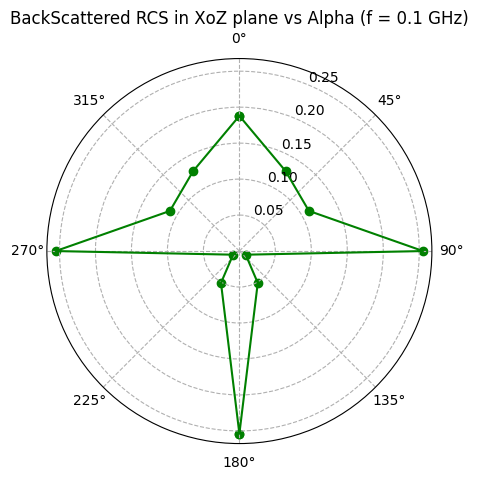

Time taken: 0.82 seconds


In [76]:
import os
import re
import torch
import matplotlib.pyplot as plt
import numpy as np
import time

tic = time.time()

src_folder = "/mnt/Disk/jiangxiaotian/puredatasets/mul2347_train"
pattern = r"([a-zA-Z0-9]{4})_theta(\d+)phi(\d+)f(\d+\.\d+).pt"

data = {}

# 读取文件并筛选数据
files = os.listdir(src_folder)
for file_name in files:
    match = re.match(pattern, file_name)
    if match:
        plane = match.group(1)
        theta = int(match.group(2))
        phi = int(match.group(3))
        f = float(match.group(4))

        if plane == 'b943' and f == 0.1 and (phi == 0 or phi == 180):
            src_file_path = os.path.join(src_folder, file_name)
            tensor = torch.load(src_file_path)
            tensor[:, 0][tensor[:, 0] == 0] = tensor[:, -1][tensor[:, 0] == 0]
            rcs_value = tensor[theta*2,phi*2].item()  # 假设张量包含一个单一的RCS值

            # 存储数据
            key = (theta, phi)
            data[key] = rcs_value

# 转换数据格式用于绘图
theta_values = sorted(set(theta for theta, phi in data.keys()))
alpha_values_0 = np.deg2rad(np.array(theta_values) - 0)  # phi=0, theta 0-180 -> alpha -90 to 90
alpha_values_180 = np.deg2rad(360 - np.array(theta_values))  # phi=180, theta 0-180 -> alpha 90 to 270

rcs_values_0 = [data[(theta, 0)] for theta in theta_values if (theta, 0) in data]
rcs_values_180 = [data[(theta, 180)] for theta in theta_values if (theta, 180) in data]

# 合并alpha和RCS值
alpha_values = np.concatenate((alpha_values_0, alpha_values_180))
rcs_values = np.concatenate((rcs_values_0, rcs_values_180))

# 对 alpha_values 和 rcs_values 进行排序
sorted_idx = np.argsort(alpha_values)
sorted_alpha = alpha_values[sorted_idx]
sorted_rcs = rcs_values[sorted_idx]

# 在末尾添加第一个数据点,使曲线闭合
sorted_alpha = np.concatenate((sorted_alpha, [sorted_alpha[0]]))
sorted_rcs = np.concatenate((sorted_rcs, [sorted_rcs[0]]))

# 绘制散点图和包围曲线
plt.figure(figsize=(5, 5))
ax = plt.subplot(111, projection='polar')
ax.scatter(alpha_values, rcs_values, marker='o', color='g')
ax.plot(sorted_alpha, sorted_rcs, color='g', linestyle='-')

ax.set_title('BackScattered RCS in XoZ plane vs Alpha (f = 0.1 GHz)')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.grid(True, which="both", ls="--")
plt.savefig('polar_plot_with_curve.png')
plt.show()

toc = time.time()
print(f"Time taken: {toc - tic:.2f} seconds")

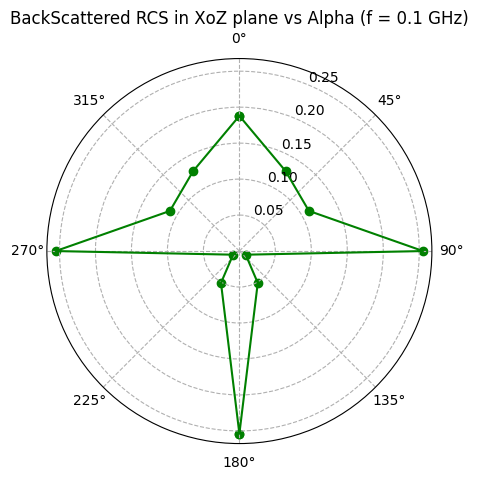

Time taken: 1.34 seconds


In [ ]:
import os
import re
import torch
import matplotlib.pyplot as plt
import numpy as np
import time

tic = time.time()

src_folder = "/mnt/Disk/jiangxiaotian/puredatasets/mul2347_train"
pattern = r"([a-zA-Z0-9]{4})_theta(\d+)phi(\d+)f(\d+\.\d+).pt"

data = {}

# 读取文件并筛选数据
files = os.listdir(src_folder)
for file_name in files:
    match = re.match(pattern, file_name)
    if match:
        plane = match.group(1)
        theta = int(match.group(2))
        phi = int(match.group(3))
        f = float(match.group(4))

        if plane == 'b943' and f == 0.1 and (phi == 0 or phi == 180):
            src_file_path = os.path.join(src_folder, file_name)
            tensor = torch.load(src_file_path)
            tensor[:, 0][tensor[:, 0] == 0] = tensor[:, -1][tensor[:, 0] == 0]
            rcs_value = tensor[theta*2,phi*2].item()  # 假设张量包含一个单一的RCS值

            # 存储数据
            key = (theta, phi)
            data[key] = rcs_value

# 转换数据格式用于绘图
theta_values = sorted(set(theta for theta, phi in data.keys()))
alpha_values_0 = np.deg2rad(np.array(theta_values) - 0)  # phi=0, theta 0-180 -> alpha -90 to 90
alpha_values_180 = np.deg2rad(360 - np.array(theta_values))  # phi=180, theta 0-180 -> alpha 90 to 270

rcs_values_0 = [data[(theta, 0)] for theta in theta_values if (theta, 0) in data]
rcs_values_180 = [data[(theta, 180)] for theta in theta_values if (theta, 180) in data]

# 合并alpha和RCS值
alpha_values = np.concatenate((alpha_values_0, alpha_values_180))
rcs_values = np.concatenate((rcs_values_0, rcs_values_180))

# 对 alpha_values 和 rcs_values 进行排序
sorted_idx = np.argsort(alpha_values)
sorted_alpha = alpha_values[sorted_idx]
sorted_rcs = rcs_values[sorted_idx]

# 在末尾添加第一个数据点,使曲线闭合
sorted_alpha = np.concatenate((sorted_alpha, [sorted_alpha[0]]))
sorted_rcs = np.concatenate((sorted_rcs, [sorted_rcs[0]]))

# 绘制散点图和包围曲线
plt.figure(figsize=(5, 5))
ax = plt.subplot(111, projection='polar')
ax.scatter(alpha_values, rcs_values, marker='o', color='g')
ax.plot(sorted_alpha, sorted_rcs, color='g', linestyle='-')

ax.set_title('BackScattered RCS in XoZ plane vs Alpha (f = 0.1 GHz)')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.grid(True, which="both", ls="--")
plt.savefig('polar_plot_with_curve.png')
plt.show()

toc = time.time()
print(f"Time taken: {toc - tic:.2f} seconds")